In [58]:
#Import Libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [59]:
#Loading the data
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [60]:
print(df.dtypes)#shows the Datatypes of the columns 

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


In [61]:
print(df.shape) #show the number of rows and columns

(200, 4)


In [62]:
print(df.describe(include='all')) #Give The Summary of the Dataset

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [63]:
df.info() #Show The Datatypes And the missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [64]:
df.columns #Disply the columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [65]:
#Display the first 5 rows of the dataset
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


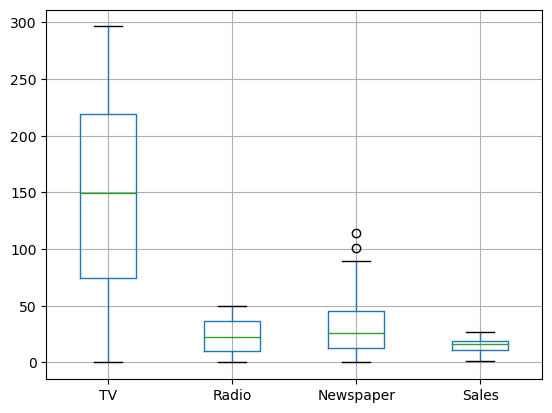

In [66]:
df.boxplot() #boxplot to find outliers
plt.show()

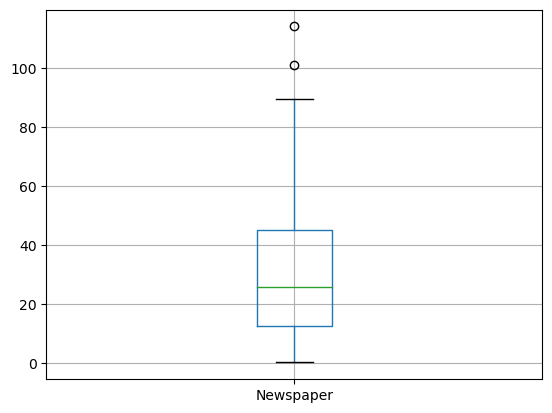

In [67]:
df.boxplot(column="Newspaper") #will show a specific columns
plt.show()

In [68]:
# Calculate Q1 (25th percentile)
Q1 = df['Newspaper'].quantile(0.25)
Q1

12.75

In [69]:
# Calculate Q3 (75th percentile)
Q3 = df['Newspaper'].quantile(0.75)
Q3

45.1

In [70]:
# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1
IQR

32.35

In [71]:
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [72]:
# Filter out the outliers
df_cleaned = df[(df['Newspaper'] >= lower_bound) & (df['Newspaper'] <= upper_bound)]

In [73]:
# Display the cleaned DataFrame
print(df_cleaned)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[198 rows x 4 columns]


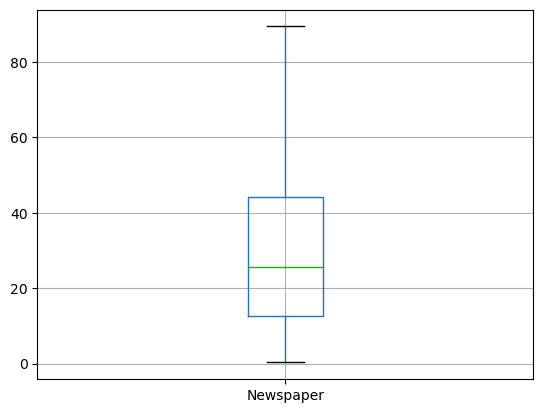

In [74]:
df_cleaned.boxplot(column="Newspaper") #will show a specific columns
plt.show()

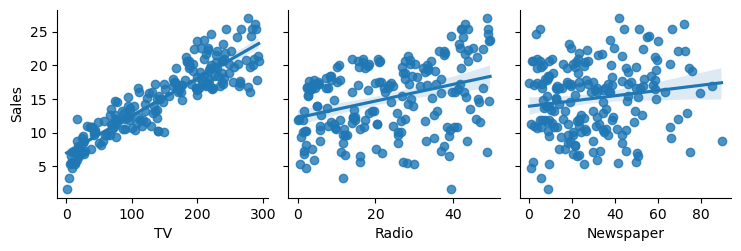

In [75]:
sns.pairplot(df_cleaned,
             x_vars=["TV","Radio","Newspaper"],
             y_vars="Sales",
             kind='reg')
plt.show()

In [76]:
#To Check missing values by using condition 
if df_cleaned.isnull().any().any():
    print("There is a missing value in the data Frame")
else:
    print("There is not missing value in the dataFrame")

There is not missing value in the dataFrame


In [77]:
df_cleaned.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [78]:
#checking missing value
def check_missing_value(data):
    """
    Objective: Check missing value count and percentage in all columns
    
    data: input data frame 
    return: Missing value data frame 

    """
    total = data.isnull().sum().sort_values(ascending=False)
    percent= (data.isnull().sum()/data.isnull().count()  * 100).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    return missing_data

In [79]:
miss = check_missing_value(df_cleaned)
miss

,Total,Percent
TV,0,0.0
Radio,0,0.0
Newspaper,0,0.0
Sales,0,0.0


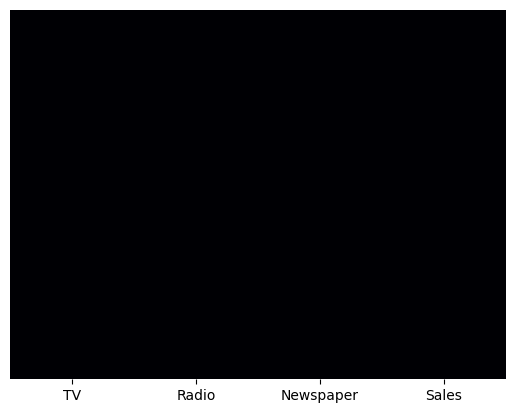

In [80]:
#plt.figure(figsize=(15,5))
sns.heatmap(df_cleaned.isnull(), cbar = False, yticklabels=False, cmap="magma" )
plt.show()

In [81]:
#split the data into independent variables (X) and the dependent variable (y)
X = df_cleaned[['TV','Radio','Newspaper']]
Y = df_cleaned['Sales']

In [82]:
X #Independent Variables 

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [83]:
Y #Dependent Variable

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 198, dtype: float64

In [84]:
#split the data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,  Y, test_size=0.2,random_state=32)  

In [85]:
#Initialize the Linear Model
model = LinearRegression()

In [86]:
#Train the model on the training data
model.fit(X_train,Y_train)

LinearRegression()

In [87]:
X_train

,TV,Radio,Newspaper
183,287.6,43.0,71.8
14,204.1,32.9,46.0
194,149.7,35.6,6.0
23,228.3,16.9,26.2
98,289.7,42.3,51.2
...,...,...,...
192,17.2,4.1,31.6
126,7.8,38.9,50.6
55,198.9,49.4,60.0
135,48.3,47.0,8.5


In [88]:
#Predict the sales on the testing data
y_predit =  model.predict(X_test)
print(y_predit)

[ 8.13097617  9.27905976 19.04900193 17.38937094 22.19925367 23.69217958
 12.7580793   8.48933655 19.68124025 10.33139242 13.17598574 14.9230852
  7.54195406  7.32100163 12.43571015  9.18125789 10.29276694 21.21264848
 11.74528495 16.69227452 20.66148026 13.91234133 14.26959474  6.52757304
 20.06531623 14.9409715  15.34704161 21.41061772  7.12004551  9.55365164
 21.2079192   8.77921089 18.76493472  6.30280624 17.3410129  24.91181519
 18.1701829  21.3788486  10.27246523 20.24417428]


In [89]:
#prediction vales
# try changing the value of X 
X1=300 # tv
X2=200 # radio
X3=0 # newspaper
y_pred_single_data=3.5963760844147785+(12.78240791 *X1)+(9.5053313 *X2)+(-0.19952401*X3)
print(y_pred_single_data)

5739.385009084415


In [90]:
#Will Disply A New DataFrame
new_df = pd.DataFrame()
new_df = X_test

new_df["Actual Sales"] = Y_test #New Actual Sales  Columns
new_df["Predicted Sales"] = y_predit #New Predicted Sales  Columns
new_df

,TV,Radio,Newspaper,Actual Sales,Predicted Sales
132,8.4,27.2,2.1,5.7,8.130976
129,59.6,12.0,43.1,9.7,9.279060
74,213.4,24.6,13.1,17.0,19.049002
174,222.4,3.4,13.1,16.5,17.389371
47,239.9,41.5,18.5,23.2,22.199254
30,292.9,28.3,43.2,21.4,23.692180
145,140.3,1.9,9.0,10.3,12.758079
182,56.2,5.7,29.7,8.7,8.489337
27,240.1,16.7,22.9,20.9,19.681240
2,17.2,45.9,69.3,12.0,10.331392


In [91]:
from sklearn.metrics import r2_score, mean_squared_error
r2=r2_score(Y_test,y_predit)
print("R Square: ", r2)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted R Square: ", adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(Y_test,y_predit))
print("RMSE: ", rmse)

R Square:  0.9204790313482639
Adjusted R Square:  0.9192493256474639
RMSE:  1.6111333880417673


In [92]:
print(min(Y))
print(max(Y))      

1.6
27.0


In [93]:
#Convert The Output Into New Datafame 
new_df["Deviation"] = new_df["Actual Sales"] - new_df["Predicted Sales"]
new_df.to_csv("Advertising_Pred.csv", header=True, index=False) #Save The DataFame Into CSV File

In [94]:
new_df.head() #Will Disply the First 5 Rews Of The DataFrame

,TV,Radio,Newspaper,Actual Sales,Predicted Sales,Deviation
132,8.4,27.2,2.1,5.7,8.130976,-2.430976
129,59.6,12.0,43.1,9.7,9.279060,0.420940
74,213.4,24.6,13.1,17.0,19.049002,-2.049002
174,222.4,3.4,13.1,16.5,17.389371,-0.889371
47,239.9,41.5,18.5,23.2,22.199254,1.000746


In [95]:
#Load The New DataSet
df = pd.read_csv("Advertising_Pred.csv")
df 

,TV,Radio,Newspaper,Actual Sales,Predicted Sales,Deviation
0,8.4,27.2,2.1,5.7,8.130976,-2.430976
1,59.6,12.0,43.1,9.7,9.279060,0.420940
2,213.4,24.6,13.1,17.0,19.049002,-2.049002
3,222.4,3.4,13.1,16.5,17.389371,-0.889371
4,239.9,41.5,18.5,23.2,22.199254,1.000746
5,292.9,28.3,43.2,21.4,23.692180,-2.292180
6,140.3,1.9,9.0,10.3,12.758079,-2.458079
7,56.2,5.7,29.7,8.7,8.489337,0.210663
8,240.1,16.7,22.9,20.9,19.681240,1.218760
9,17.2,45.9,69.3,12.0,10.331392,1.668608
